# Spatial interpolation

Created by 
* [Li, Chaonan (李超男)](https://www.researchgate.net/profile/Chaonan-Li-5) / licn@mtc.edu.cn / [Ecological Security and Protection Key Laboratory of Sichuan Province, Mianyang Normal University](https://zdsys.mtc.edu.cn/)
* Liao, Haijun (廖海君) / liaohj@mtc.edu.cn /
[Engineering Research Center of Chuanxibei RHS Construction at Mianyang Normal University of Sichuan Province](https://rhs.mtc.edu.cn/)

Reviewed by [Li, Xiangzhen (李香真)](https://www.researchgate.net/profile/Xiangzhen-Li-2) / lixz@fafu.edu.cn /
[College of Resources and Environment, Fujian Agriculture and Forestry University](https://zhxy.fafu.edu.cn/main.htm)

To predict microbial traits in the unsampled areas, we also implemented several function for spatial interpolations. See the follwoing examples for details.

## Load required R packages

Here we need four R packages for this section of microgeo R package tutorial. Just run the following codes to import them into R environment.

In [1]:
# Install and load `magrittr`, `ggplot2`, `devtools` and `microgeo` packages 
if (!suppressMessages(require(magrittr))) install.packages("magrittr")
if (!require(ggplot2)  %>% suppressMessages) install.packages("ggplot2")
if (!require(devtools) %>% suppressMessages) install.packages("devtools")
if (!require(microgeo) %>% suppressMessages) devtools::install_github("ChaonanLi/microgeo")

## Create a standard microgeo dataset

We also need a standard microgeo dataset for the presentations in the section of tutorial.

In [2]:
# Example by using the map downloaded from DataV.GeoAtlas
data(qtp)
map <- read_aliyun_map(adcode = c(540000, 630000, 510000)) %>% suppressMessages() 
dataset.dts.aliyun <- create_dataset(mat = qtp$asv, ant = qtp$tax, met = qtp$met, map = map,
                                     phy = qtp$tre, env = qtp$env, lon = "longitude", lat = "latitude") 
dataset.dts.aliyun %<>% rarefy_count_table() 
dataset.dts.aliyun %<>% tidy_dataset()
dataset.dts.aliyun %<>% calc_alpha_div(measures = c("observed", "shannon")) 
dataset.dts.aliyun %<>% calc_beta_div(measures = c("bray", "jaccard")) 
dataset.dts.aliyun %>% show_dataset()

ℹ [2023-10-12 10:50:34] INFO ==> all samples fall within the map area!

ℹ [2023-10-12 10:50:34] INFO ==> dataset has been created successfully!

ℹ [2023-10-12 10:50:34] INFO ==> use `object %>% show_dataset()` to check the summary of dataset.

ℹ [2023-10-12 10:50:37] INFO ==> the ASV/gene abundance table has been rarefied with a sub-sample depth of 5310

✔ [2023-10-12 10:50:42] SAVE ==> new results have been saved to: object$div$alpha

✔ [2023-10-12 10:51:27] SAVE ==> new results have been saved to: object$div$beta



── The Summary of Microgeo Dataset ─────────────────────────────────────────────


ℹ object$mat: 6808 ASVs/genes and 1244 samples [subsample depth: 5310]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$div$alpha: 2 alpha diversity index/indices (observed, shannon)

✔ object$div$beta: 2 beta diversity distance matrix/matrices (bray, jaccard)




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


## Nearest neighbour interpolation

! [2023-10-12 10:51:28] WARN ==> only use 420 out of 1244 sampling sites for interpolation!

! [2023-10-12 10:51:28] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



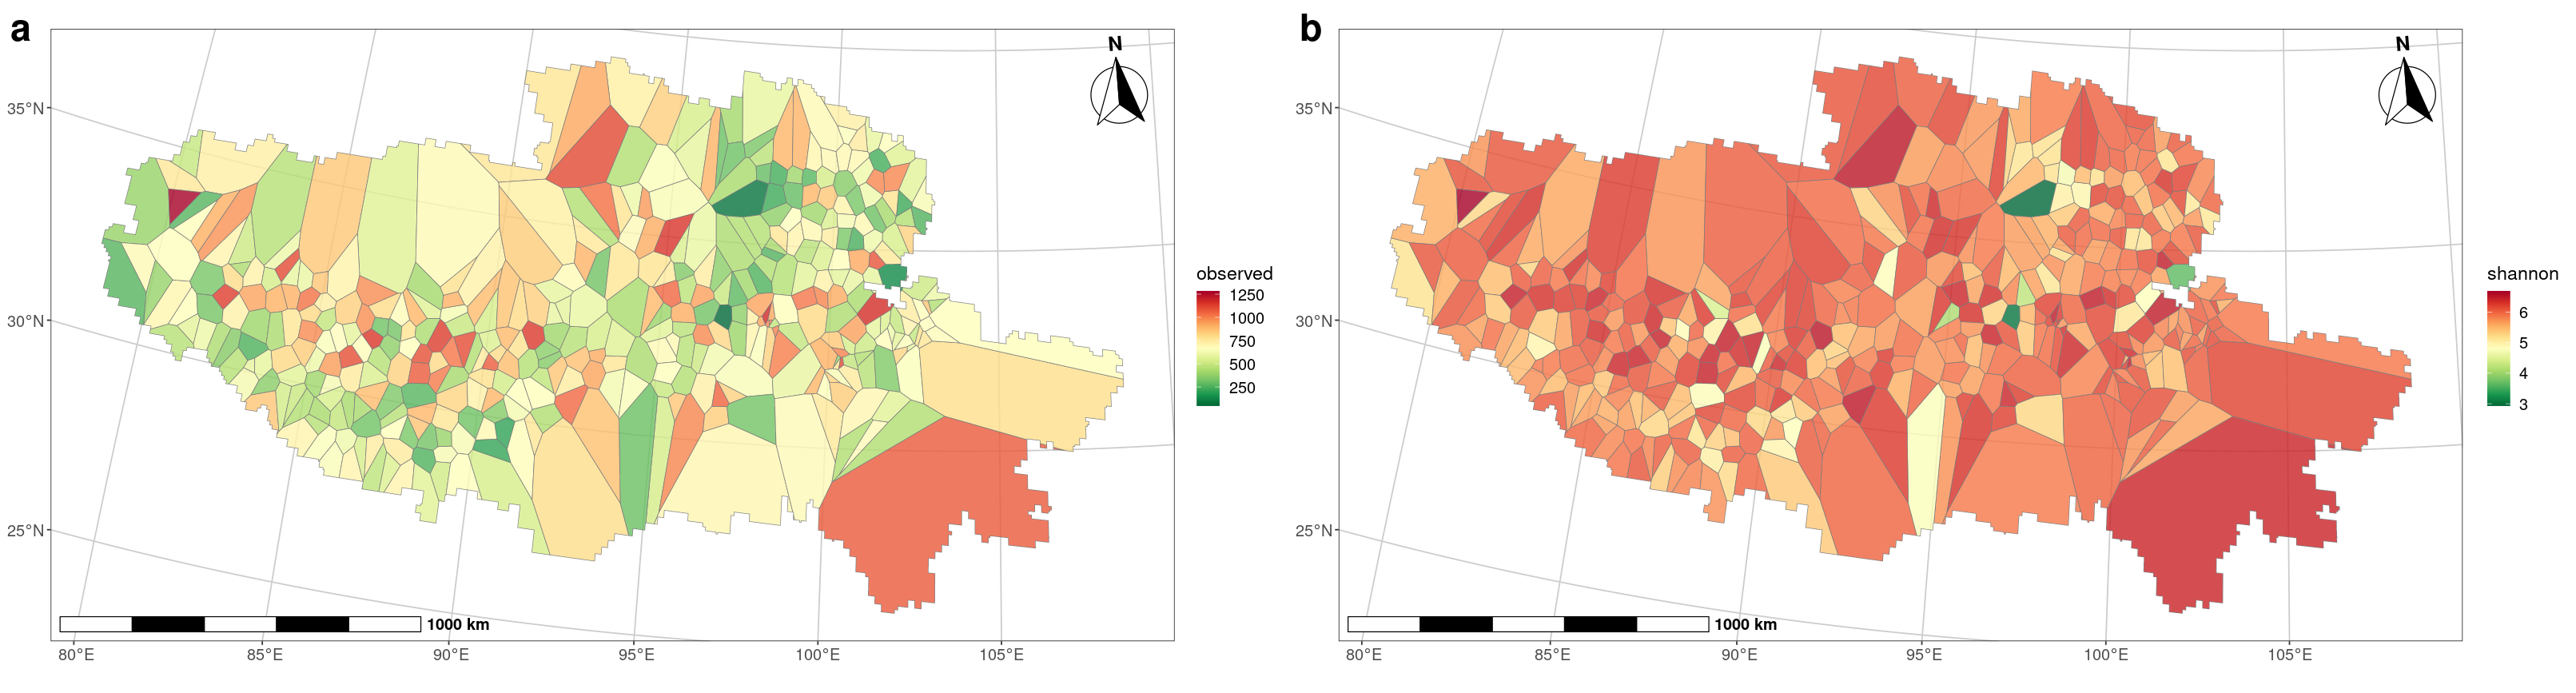

In [3]:
# Nearest neighbour interpolation for alpha diversity indices
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.23)
sim1 <- interp_nen(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', trim.dup = TRUE) %>% 
    plot_nmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()
sim2 <- interp_nen(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', trim.dup = TRUE) %>%
    plot_nmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(sim1, sim2, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## Polynomial fit (2nd order) interpolation

! [2023-10-12 10:51:30] WARN ==> only use 420 out of 1244 sampling sites for interpolation!

! [2023-10-12 10:51:30] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



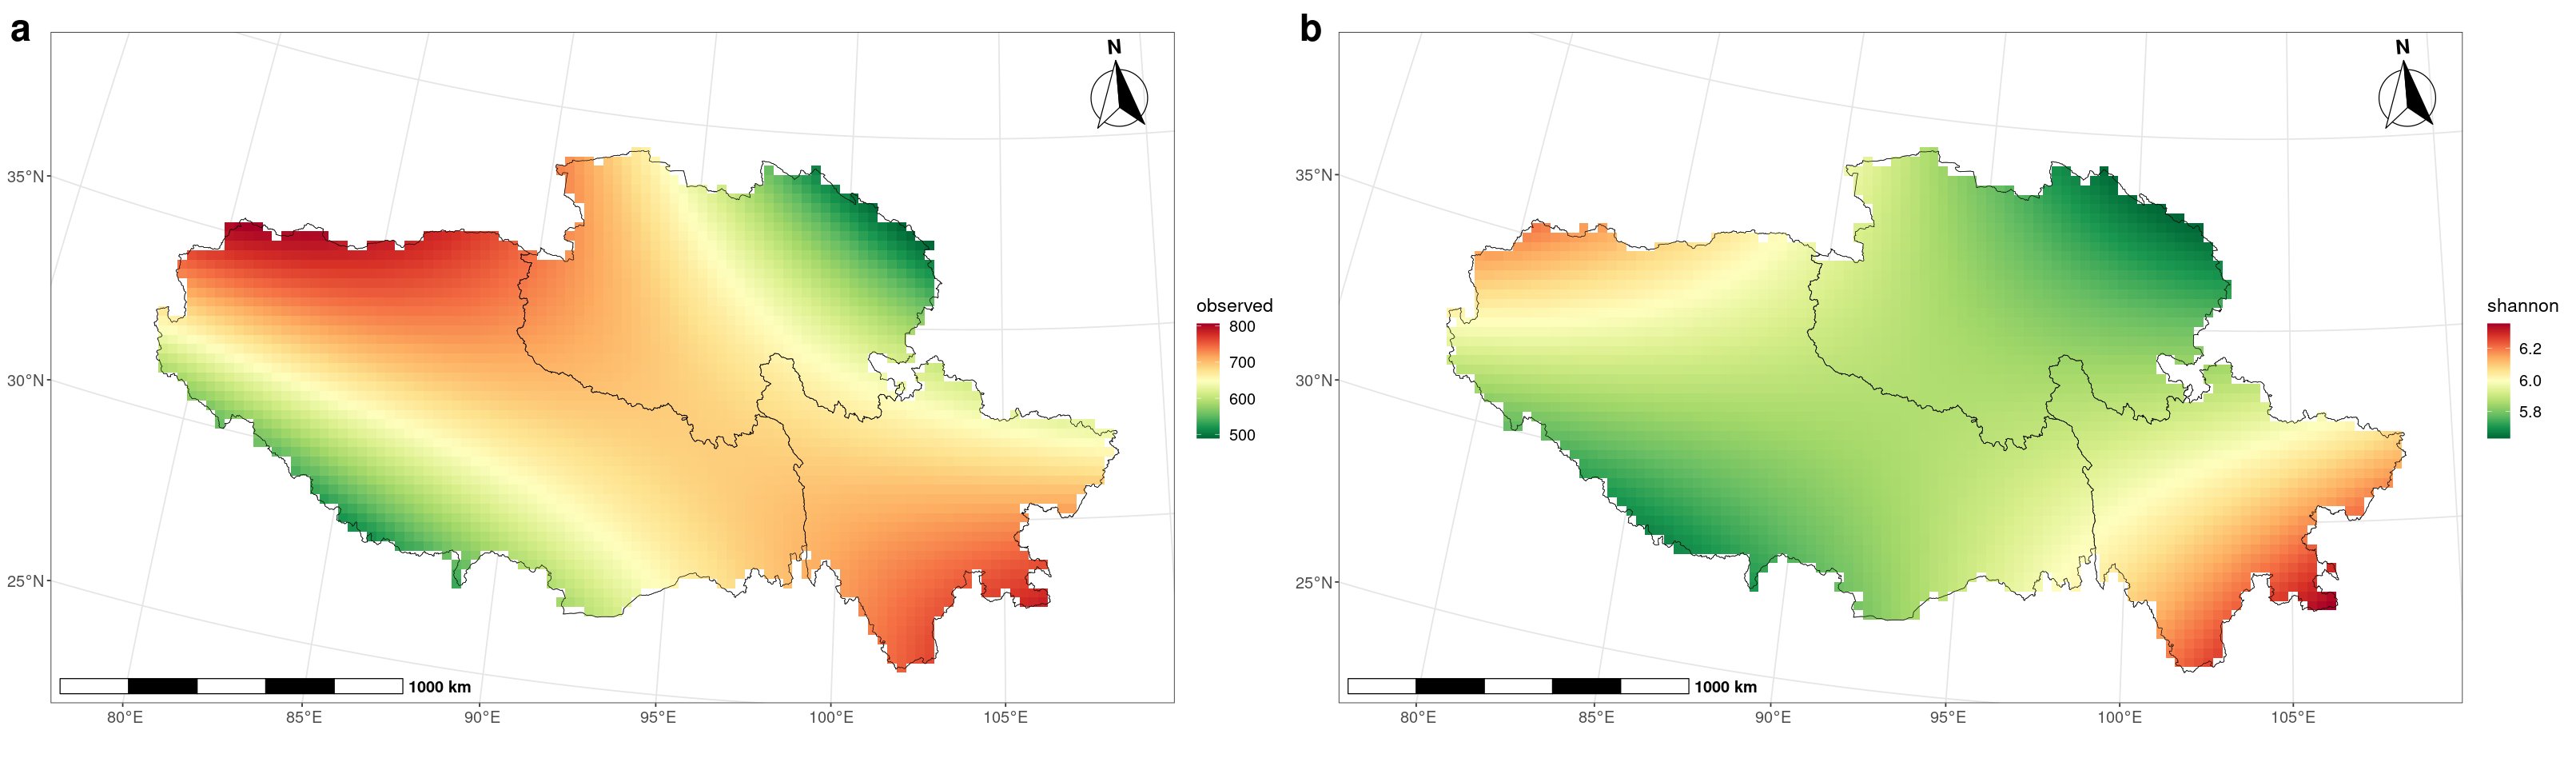

In [4]:
# 2nd polynomial fit interpolation for alpha diversity indices
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
pol.rst.observed <- interp_pol(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', trim.dup = TRUE)
pol.rst.shannon  <- interp_pol(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', trim.dup = TRUE)
sim3 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = pol.rst.observed) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim4 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = pol.rst.shannon) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim3, sim4, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## Inverse distance weighting (IDW) interpolation

! [2023-10-12 10:51:32] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


! [2023-10-12 10:51:37] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


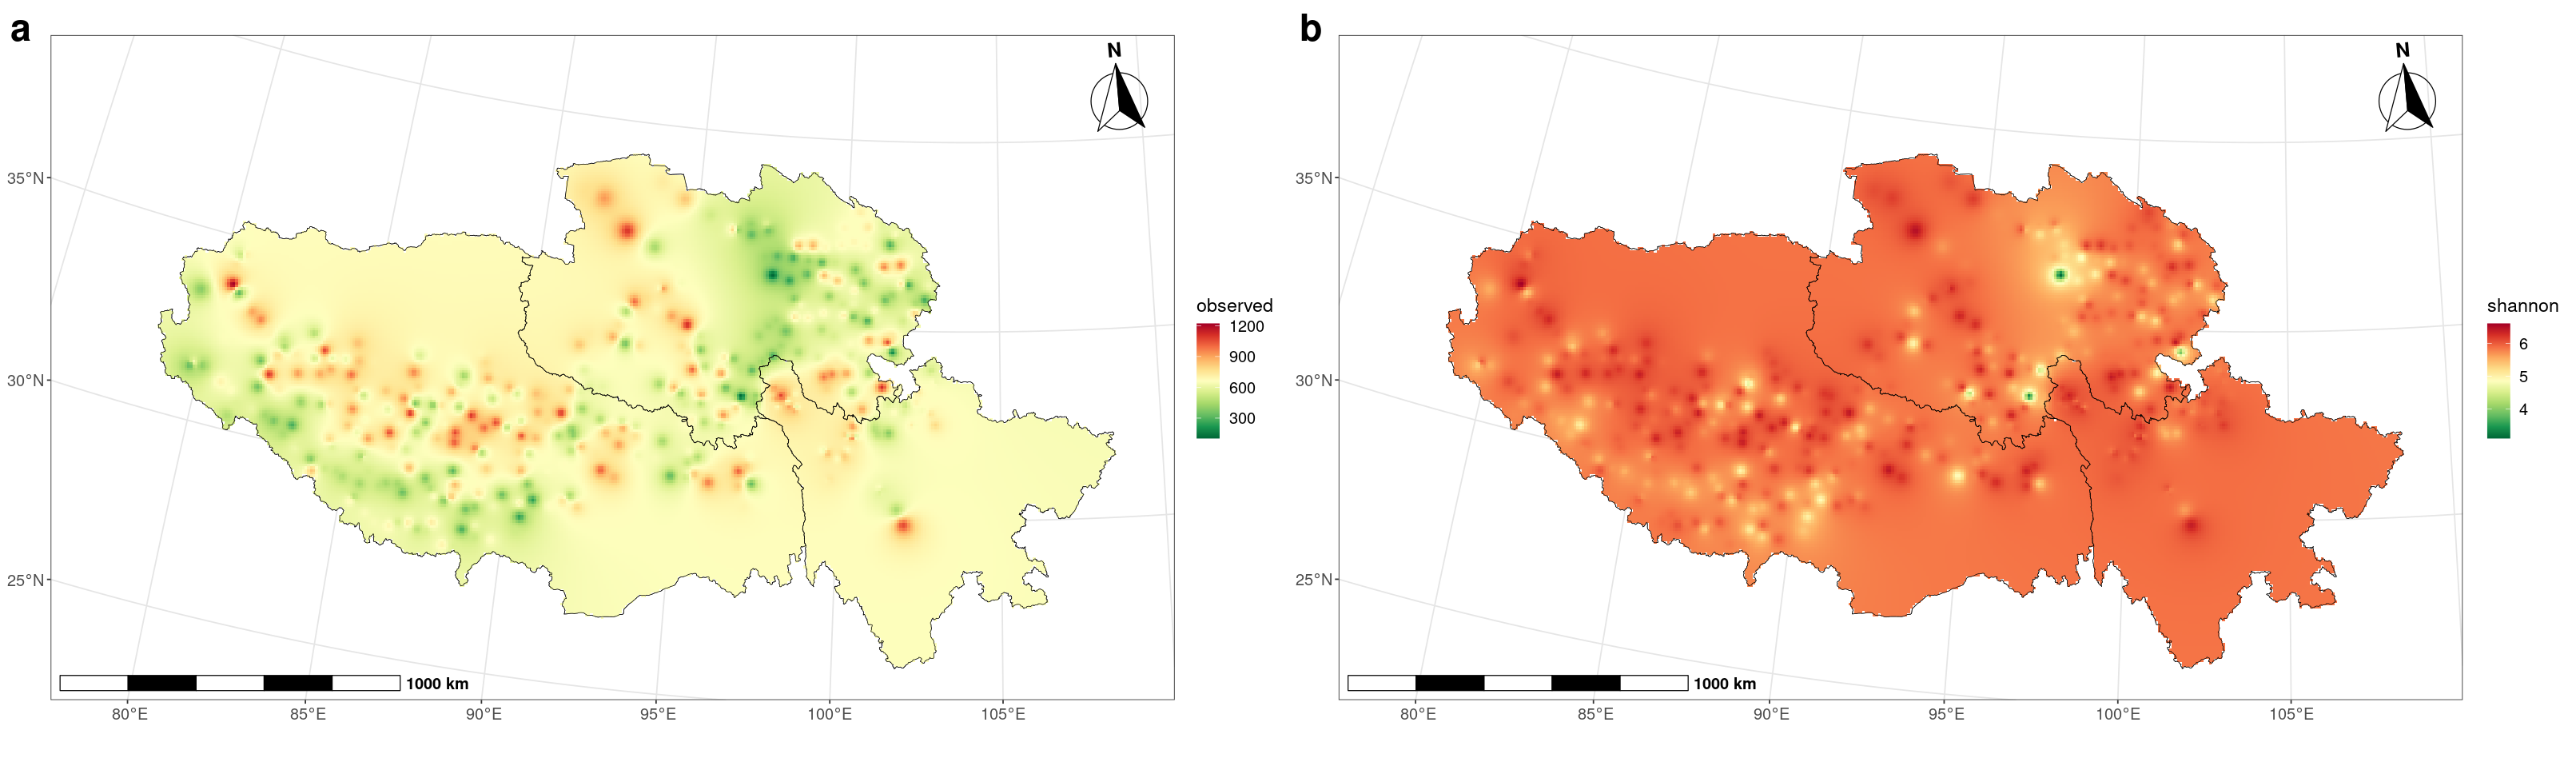

In [5]:
# Inverse distance weighting (IDW) interpolation for alpha diversity indices(type = 'regular')
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
idw.rst.observed <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', type = 'regular', trim.dup = TRUE)
idw.rst.shannon  <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', type = 'regular', trim.dup = TRUE)
sim5 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = idw.rst.observed) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim6 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = idw.rst.shannon) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim5, sim6, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

! [2023-10-12 10:51:43] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


! [2023-10-12 10:51:50] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


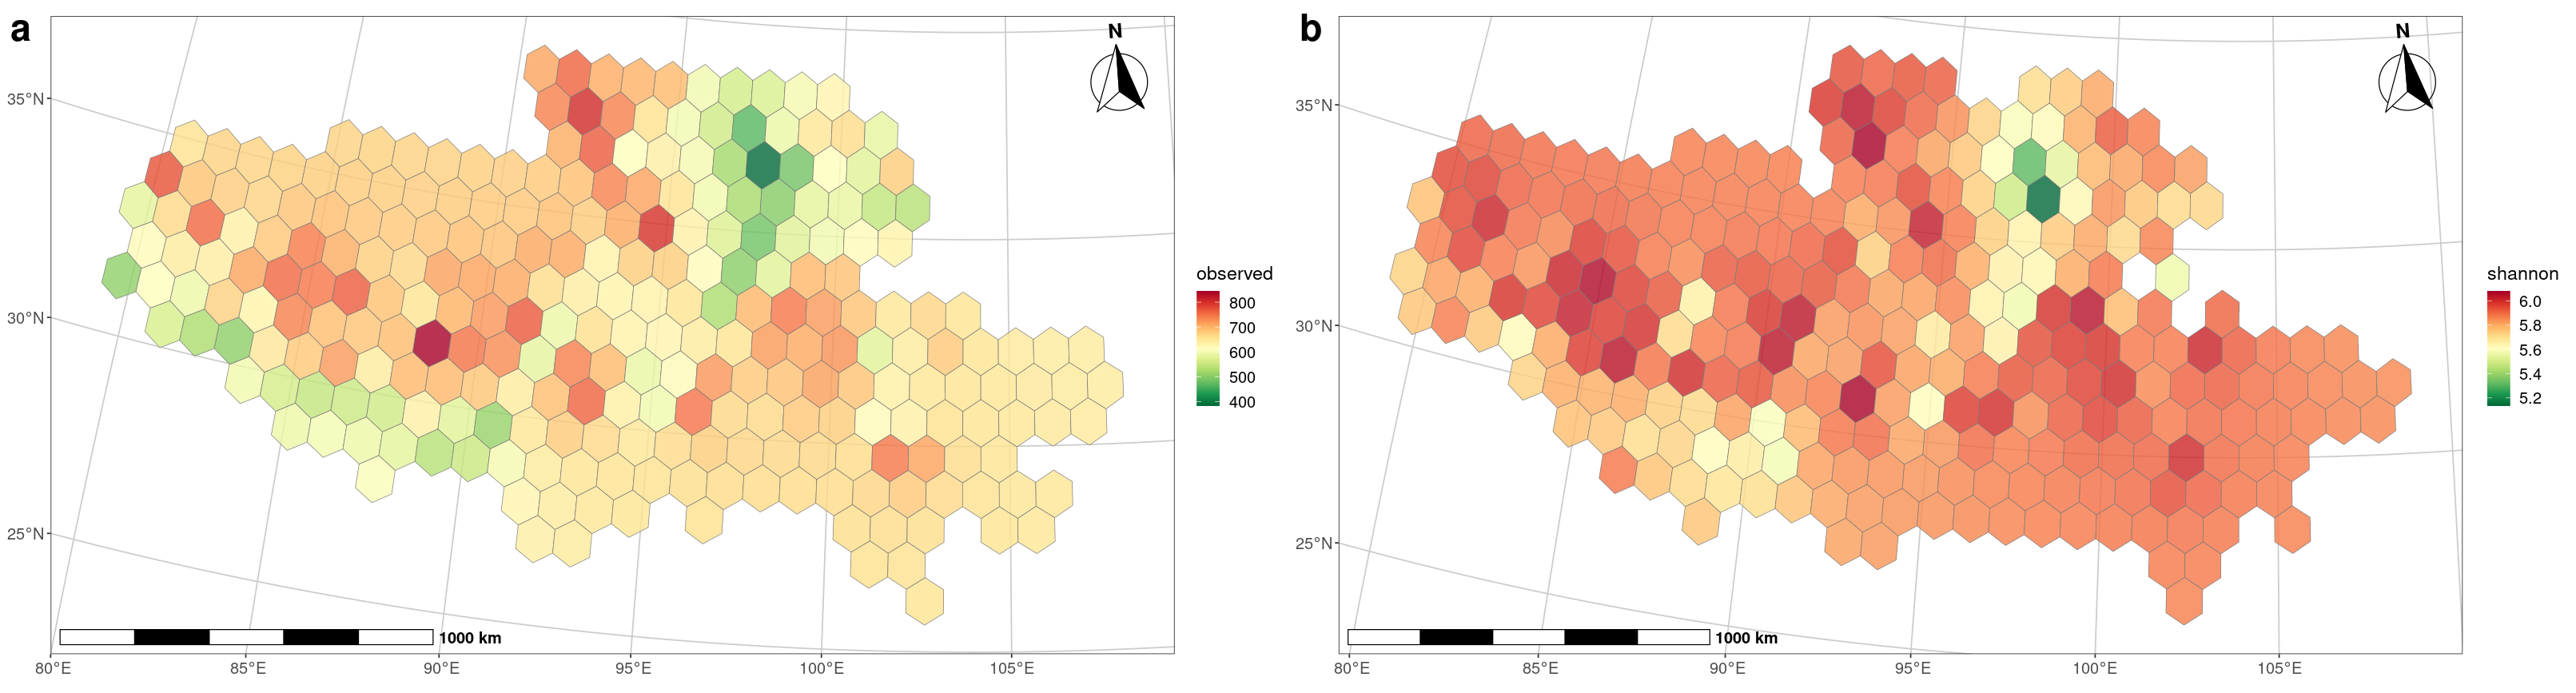

In [6]:
# Inverse distance weighting (IDW) interpolation for alpha diversity indices (type = 'hexagonal')
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.23)
sim7 <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', type = 'hexagonal', trim.dup = TRUE) %>%
    plot_imap() %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim8 <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', type = 'hexagonal', trim.dup = TRUE) %>%
    plot_imap() %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim7, sim8, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## Kriging interpolation

! [2023-10-12 10:51:58] WARN ==> only use 420 out of 1244 sampling sites for interpolation!

! [2023-10-12 10:51:58] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



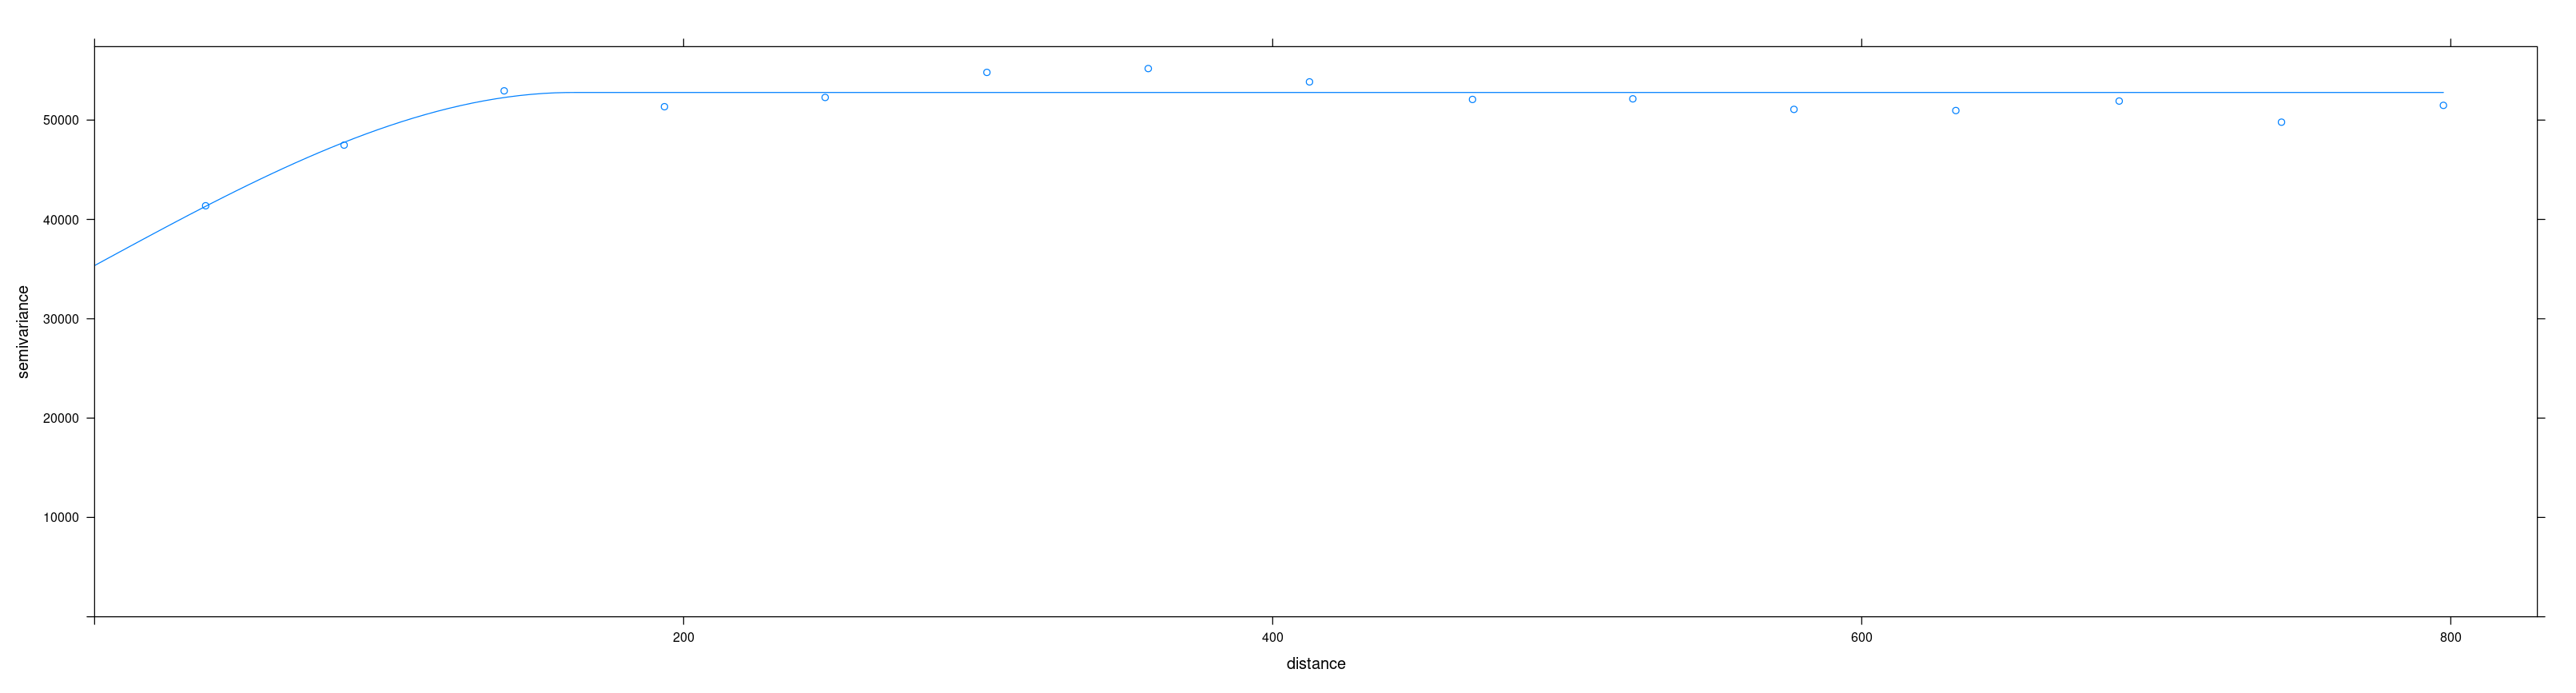

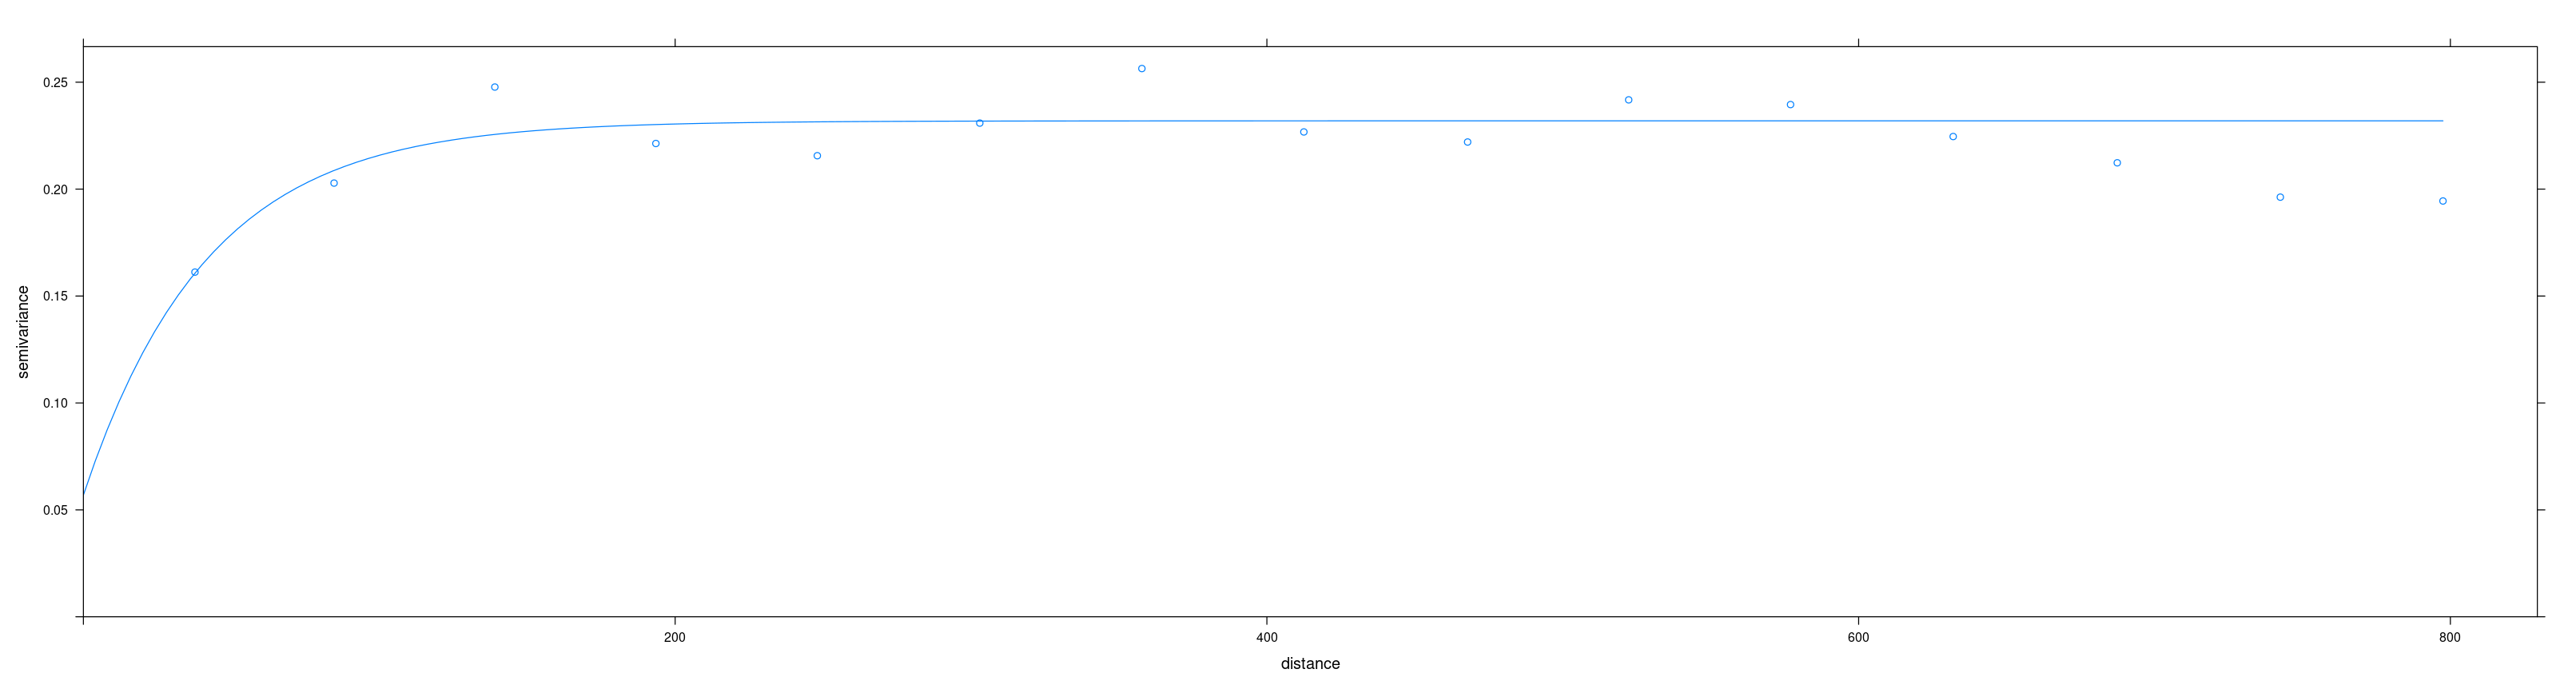

In [7]:
# Test models
interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
           var = 'observed', model = 'Sph', test.model = TRUE, trim.dup = TRUE)
interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
          var = 'shannon', model = 'Mat', test.model = TRUE, trim.dup = TRUE)

In [8]:
# Perform kriging interpolation for alpha diversity indices
kri.rst.observed <- interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
                               var = 'observed', model = 'Sph', trim.dup = TRUE)
kri.rst.shannon <- interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
                              var = 'shannon', model = 'Mat', trim.dup = TRUE)

! [2023-10-12 10:51:59] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[using ordinary kriging]


! [2023-10-12 10:52:00] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[using ordinary kriging]


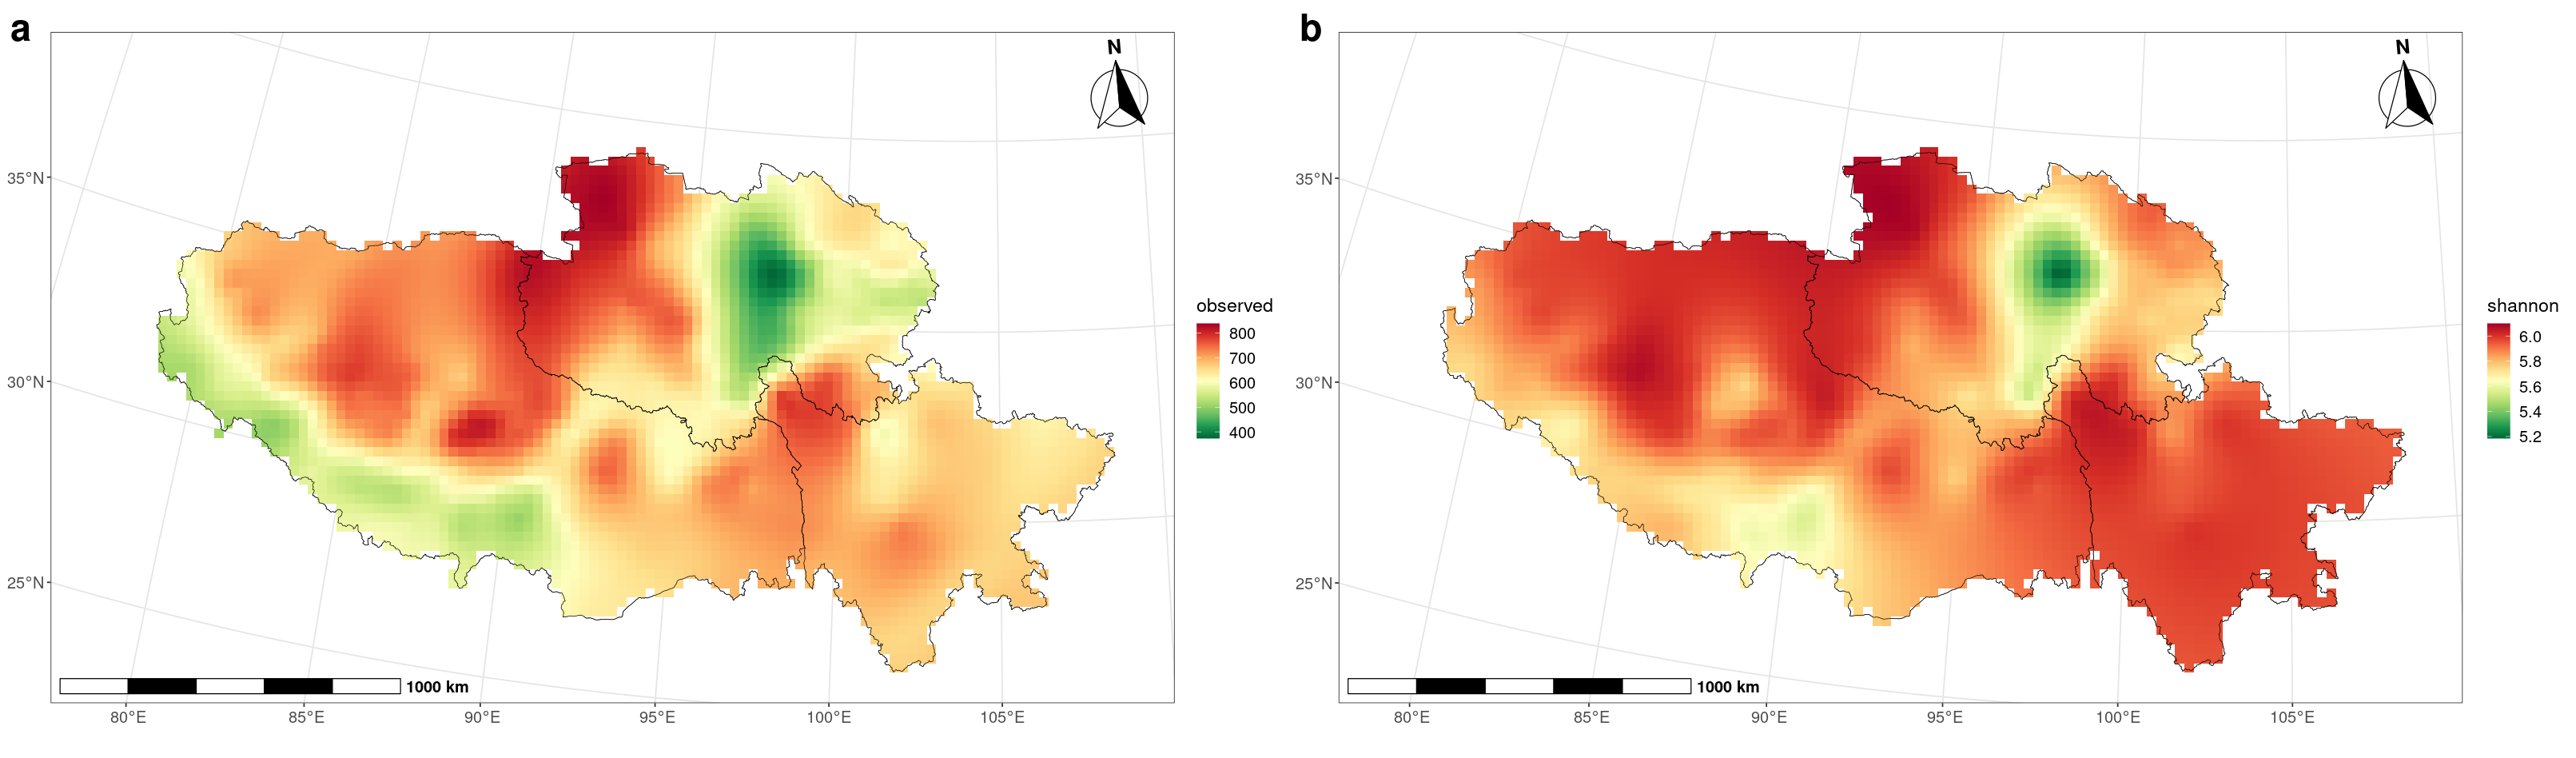

In [9]:
# Visualize kriging interpolation
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
sim9 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = kri.rst.observed) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim10 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = kri.rst.shannon) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim9, sim10, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()